In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
x = pd.read_csv('data_sets\\dengue_features_train.csv')
y = pd.read_csv('data_sets\\dengue_labels_train.csv')
x.drop(['city', 'week_start_date'], axis=1, inplace=True)
y= y['total_cases']
y=pd.DataFrame(y)

In [3]:
x.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
y.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [5]:
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [6]:
#now that we have our data as features and labels we can now create a split between test and train data with a random split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 464 to 1126
Data columns (total 22 columns):
year                                     1019 non-null int64
weekofyear                               1019 non-null int64
ndvi_ne                                  1019 non-null float64
ndvi_nw                                  1019 non-null float64
ndvi_se                                  1019 non-null float64
ndvi_sw                                  1019 non-null float64
precipitation_amt_mm                     1019 non-null float64
reanalysis_air_temp_k                    1019 non-null float64
reanalysis_avg_temp_k                    1019 non-null float64
reanalysis_dew_point_temp_k              1019 non-null float64
reanalysis_max_air_temp_k                1019 non-null float64
reanalysis_min_air_temp_k                1019 non-null float64
reanalysis_precip_amt_kg_per_m2          1019 non-null float64
reanalysis_relative_humidity_percent     1019 non-null float64
reanalysis_sa

In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 464 to 1126
Data columns (total 1 columns):
total_cases    1019 non-null int64
dtypes: int64(1)
memory usage: 15.9 KB


In [8]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 497 to 135
Data columns (total 22 columns):
year                                     437 non-null int64
weekofyear                               437 non-null int64
ndvi_ne                                  437 non-null float64
ndvi_nw                                  437 non-null float64
ndvi_se                                  437 non-null float64
ndvi_sw                                  437 non-null float64
precipitation_amt_mm                     437 non-null float64
reanalysis_air_temp_k                    437 non-null float64
reanalysis_avg_temp_k                    437 non-null float64
reanalysis_dew_point_temp_k              437 non-null float64
reanalysis_max_air_temp_k                437 non-null float64
reanalysis_min_air_temp_k                437 non-null float64
reanalysis_precip_amt_kg_per_m2          437 non-null float64
reanalysis_relative_humidity_percent     437 non-null float64
reanalysis_sat_precip_amt_mm 

In [9]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 497 to 135
Data columns (total 1 columns):
total_cases    437 non-null int64
dtypes: int64(1)
memory usage: 6.8 KB


In [10]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
regr = RandomForestRegressor()
regr.fit(x_train, y_train)


C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [11]:
y_pred1 = clf.predict(x_test)


In [12]:
print(mean_squared_error(y_test, y_pred1))
print("Accuracy of decision tree model : " + str(clf.score(x,y)*100) + str("%"))

2326.9107551487414
Accuracy of decision tree model : 72.11538461538461%


In [13]:
#NOTE THAT IN REGRESSIONAL ANALYSIS THE MSE WAS AROUND 2033 and accuracy of about 17.5%. This is a positive indicator that a non customised decision tree classifier works better than regression
#for this particular dataset as accuracy jumps from 17.5 % to 72.25%
#lets try to bring the mse even lower 

In [14]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
y_pred2 = regr.predict(x_test)
print(mean_squared_error(y_test, y_pred2))
print("Accuracy of random forest regressor : "+ str(regr.score(x,y)*100) + str("%"))

889.470938215103
Accuracy of random forest regressor : 82.17211540979986%


In [16]:
#accuracy of random forest regressor is brought to a whooping 81.1% 
#Remeber, we started with 17.5% and 2033 MSE from regressional analysis <-

In [17]:
x.head()
#to demonstrate overfitting - >

model_test = RandomForestRegressor()

def sigmoid(x):
    return(  (1.0)/(1+np.exp(-1*x)  ) )
for i in range(10):
    x_train_, x_test_, y_train_, y_test_ = train_test_split(x,y,test_size =sigmoid(i)*0.1, random_state = i )
    model_test.fit(x_train_, y_train_)

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

In [18]:
y_pred_ = model_test.predict(x_test)

In [19]:
print(model_test.score(x,y)*100) 

91.25641346392108


In [20]:
# 4- 63; 10- 88. 100- 87, 50- 81, 10-87, 10-90
print(mean_squared_error(y_test, y_pred_))
model_test.get_params()

187.97391304347826


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
#This way, we train our model recursively on the training targets and features and make our model recursively better 
#since we are splitting the data here as training and testing data and repeatedly training it there's a high chance, 
#that the model will cover all the training points and this can lead to a severe case of
''' OVERFITTING'''
'''
We Can prevent overfitting by keeping the number of iterations in the above for loop less. This will lower the probablity of training 
data to be memorised and hence even though we get a high accuracy on the training data, we cannot be sure that  we will also get
a high accuracy on data that the model has never seen before. 
This helps us conclude  that without any major customisation , for the given dataset we can expect the best built in model as 
RandomForestRegressor with an accuracy in the range of 75-85 % with some amount of iterative learning (but not too much)
which compared to plain regression gives us a much better margin 
'''

'\nWe Can prevent overfitting by keeping the number of iterations in the above for loop less. This will lower the probablity of training \ndata to be memorised and hence even though we get a high accuracy on the training data, we cannot be sure that  we will also get\na high accuracy on data that the model has never seen before. \nThis helps us conclude  that without any major customisation , for the given dataset we can expect the best built in model as \nRandomForestRegressor with an accuracy in the range of 75-85 % with some amount of iterative learning (but not too much)\nwhich compared to plain regression gives us a much better margin \n'

In [22]:
#lets perform a data visualisation of the above Random Forest Regressor method to see how the model fits the data 

In [23]:
import matplotlib.pyplot as plt


#from the below plots it is visible that the model fits the base values really well and unlike regression, also stretches towards
#the upper curve, to try to fit the data it has never seen



#depciting extent of model fitting on attribute : 'weekofyear' of x_test VS predictions(blue) and actual value(red) 

plt.scatter(x_test['weekofyear'], y_pred1, color ='blue')
plt.scatter(x_test['weekofyear'], y_test, color = 'red')
plt.show()


#model fitting in another attribute of x_test : precipitation_amt_mm : 

plt.scatter(x_test['precipitation_amt_mm'], y_pred1, color ='yellow')
plt.scatter(x_test['precipitation_amt_mm'], y_test, color = 'green')
plt.show()


#plotting reanalysis_specific_humidity_g_per_kg attbt. of x_test 
plt.scatter(x_test['reanalysis_specific_humidity_g_per_kg'],y_pred1, color = 'blue')
plt.scatter(x_test['reanalysis_specific_humidity_g_per_kg'], y_test, color = 'green')
plt.show()
#blue - predicted values . 
#green - actual values 

# plotting reanalysis_max_air_temp_k and reanalysis_min_air_temp_k : 

plt.scatter(x_test['reanalysis_max_air_temp_k'], y_pred1, color = 'red')
plt.scatter(x_test['reanalysis_min_air_temp_k'], y_pred1, color = 'red')
plt.scatter(x_test['reanalysis_max_air_temp_k'], y_test, color = 'yellow')
plt.scatter(x_test['reanalysis_min_air_temp_k'], y_test, color = 'blue')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

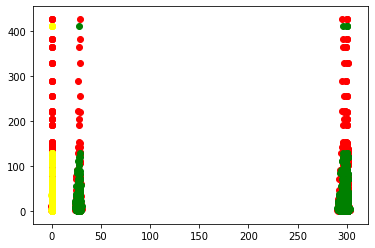

In [24]:
plt.scatter(x_test['ndvi_ne'], y_test, color = 'red')
plt.scatter(x_test['ndvi_nw'], y_test, color = 'red')
plt.scatter(x_test['ndvi_se'], y_test, color = 'red')
plt.scatter(x_test['ndvi_sw'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_air_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_dew_point_temp_k'], y_test, color = 'red')
plt.scatter(x_test['station_avg_temp_c'], y_test, color = 'red')

plt.scatter(x_test['ndvi_ne'], y_pred1, color = 'yellow')
plt.scatter(x_test['ndvi_nw'], y_pred1, color = 'yellow')
plt.scatter(x_test['ndvi_se'], y_pred1, color = 'yellow')
plt.scatter(x_test['ndvi_sw'], y_pred1, color = 'yellow')
plt.scatter(x_test['reanalysis_air_temp_k'],y_pred1, color = 'green')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_pred1, color = 'green')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_pred1, color = 'green')
plt.scatter(x_test['reanalysis_dew_point_temp_k'], y_pred1, color = 'green')
plt.scatter(x_test['station_avg_temp_c'], y_pred1, color = 'green')
#   red signifies actual values, yellow and green signify prediction points

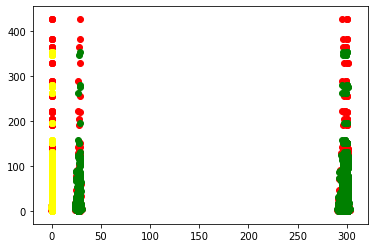

In [25]:
# now we will visualise onlt the final plot with respect to the relatively over fitted model that we created as model_test

plt.scatter(x_test['ndvi_ne'], y_test, color = 'red')
plt.scatter(x_test['ndvi_nw'], y_test, color = 'red')
plt.scatter(x_test['ndvi_se'], y_test, color = 'red')
plt.scatter(x_test['ndvi_sw'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_air_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_test, color = 'red')
plt.scatter(x_test['reanalysis_dew_point_temp_k'], y_test, color = 'red')
plt.scatter(x_test['station_avg_temp_c'], y_test, color = 'red')

plt.scatter(x_test['ndvi_ne'], y_pred_, color = 'yellow')
plt.scatter(x_test['ndvi_nw'], y_pred_, color = 'yellow')
plt.scatter(x_test['ndvi_se'], y_pred_, color = 'yellow')
plt.scatter(x_test['ndvi_sw'], y_pred_, color = 'yellow')
plt.scatter(x_test['reanalysis_air_temp_k'],y_pred_, color = 'green')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_pred_, color = 'green')
plt.scatter(x_test['reanalysis_avg_temp_k'], y_pred_, color = 'green')
plt.scatter(x_test['reanalysis_dew_point_temp_k'], y_pred_, color = 'green')
plt.scatter(x_test['station_avg_temp_c'], y_pred_, color = 'green')
#   red signifies actual values, yellow and green signify prediction points

In [37]:
# as we see from the above  plot, comparing to the plot before this model fits the training data really well, and has better reach 
#on the points towards the higher access as compared to the prev plot
#though this denotes a high accuracy (91 %) on the training set,  we cannot predict if this same accuracy will be maintained
# on data that model_test model has never seen.


In [26]:
# as we have demonstrated a bette model for the dengue data set compared to reression, and gotten an idea of what overfitting is
#and how it can occur, we can now look at ways of preventing overfitting and creating a model better trained over multiple iterations just the way
# tried above.
final_error = 10000000000000

In [27]:
#let us now try parameter tuning without avoiding any over fitting 

In [28]:
#for this we'll have to create a costly model selection method (time cost) as we'll iterate model over lists of just 3 params with 6 samples each and select the best combo 
#from all obtained mean squared error scores 
final_params = []
a = [[[None for i in range(6)] for j in range(6)] for k in range(6)]

In [29]:
n_est = range(1,100)
max_feat = [ 'sqrt', 'log2', 'auto']
min_sample_leaf_ = range(1,3)

In [30]:
#now we start training the model over all the above params and test the score
#the lowest error gets appended and list of params get appended to final_params= []
final_error = -10000000000000
for i in n_est:
    for j in max_feat:
        for k in min_sample_leaf_ :
            model = RandomForestRegressor(n_estimators = i, max_features = j, min_samples_leaf = k, criterion ='mse', min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
            #we have now created our model 
            model.fit(x_train , y_train)
            y_pred_test = model.predict(x_test)
            m= model.score(x,y)
            if m>final_error:
                final_error = m
                final_params =[]
                final_params.extend((i,j,k))
print(m)
print(final_params)

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

0.8038627331053855
[34, 'auto', 1]


In [31]:
m = (RandomForestRegressor(n_estimators = 40, max_features = 'auto', min_samples_leaf = 1, criterion ='mse', min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, min_samples_split = 2, oob_score = 'False'))

In [32]:
m.fit(x_train, y_train)

C:\Users\sidha\.conda\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score='False', random_state=None,
                      verbose=0, warm_start=False)

In [33]:
y_pr = m.predict(x_test)
print(mean_squared_error(y_test, y_pr))
print(m.score(x,y))

913.0280763729977
0.8243517452573872


In [34]:
#now with some parameter tuning we have managed to bring accuracy of our model from 17% in regression to 79% of a raw model with mse of over 1000, to now 81% with 
#MSE of 923.478 
#let us now try to make our predictions and see what happens 

In [36]:
!dir

 Volume in drive C is OS
 Volume Serial Number is AA3E-BF53

 Directory of C:\Users\sidha\Desktop\python files\Old PROJECTS\Dengue-Case-Predictor-using-RF-master\Jupyter Notebook

07-01-2020  23:31    <DIR>          .
07-01-2020  23:31    <DIR>          ..
22-07-2019  20:46    <DIR>          .ipynb_checkpoints
22-07-2019  20:46    <DIR>          Data_Sets
07-01-2020  23:31           255,274 dengue_ddriven_using_randomforest.ipynb
               1 File(s)        255,274 bytes
               4 Dir(s)  666,075,619,328 bytes free


In [39]:
X = pd.read_csv('\\Data _sets\\dengue_features_test.csv')
X.drop(['city', 'week_start_date'], axis=1, inplace=True)
X = X.fillna(x.mean())

FileNotFoundError: [Errno 2] File b'\\Data _sets\\dengue_features_test.csv' does not exist: b'\\Data _sets\\dengue_features_test.csv'

In [ ]:
X.head()

In [ ]:
Y = m.predict(X)

In [ ]:
Y

In [88]:
#prediction = pd.DataFrame(Y, columns=['predictions']).to_csv('prediction.csv')
prediction = pd.DataFrame(Y, columns=['predictions'])

In [89]:
prediction.head()

,predictions
0,4.475
1,5.600
2,6.175
3,6.600
4,14.275


In [95]:
prediction =prediction.round()

In [94]:
prediction.head()

,predictions
0,4.475
1,5.600
2,6.175
3,6.600
4,14.275


In [96]:
prediction.head()

,predictions
0,4.0
1,6.0
2,6.0
3,7.0
4,14.0


In [97]:
prediction = prediction.astype(dtype = 'int32')

In [98]:
prediction.head()

,predictions
0,4
1,6
2,6
3,7
4,14


In [100]:
pred = prediction.to_csv('predict.csv')

In [101]:
#the above  file got me a rank of 990 out of 3852 in datadriven.org 
#next step is tofurther minimise mse 
